In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import graphviz 
from sklearn import tree
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data.csv')
data.head(5)

weight  height  closing  open_00_02  open_02_04  open_04_06  open_06_08  \
0      69    1.77       12           0           0           0           0   
1      69    1.77       24           1           1           1           1   
2      69    1.77       20           0           0           0           0   
3      69    1.77       23           0           0           0           0   
4      69    1.77       23           0           0           0           0   

   open_08_10  open_10_12  open_12_14  ...  cuisine_y_Pizzeria  \
0           0           1           0  ...                   0   
1           1           1           1  ...                   0   
2           0           1           1  ...                   0   
3           0           0           0  ...                   0   
4           0           0           0  ...                   0   

   cuisine_y_Regional  cuisine_y_Seafood  cuisine_y_Vietnamese  \
0                   0                  0                     0   
1                   0                  0                     0   
2                   0                  1                     0   
3                   0                  0                     0   
4                   0                  0                     0   

   parking_lot_none  parking_lot_public  parking_lot_valet parking  \
0                 1                   0                          0   
1                 0                   1                          0   
2                 0                   0                          0   
3                 1                   0                          0   
4                 1                   0                          0   

   parking_lot_yes  age  target  
0                0   32       2  
1                0   32       0  
2                1   32       1  
3                0   32       2  
4                0   32       2  

[5 rows x 142 columns]

In [3]:
def split_data(data_x: np.ndarray, data_y: np.ndarray):
    
    ordering = np.arange(data_x.shape[0])
    np.random.shuffle(ordering)
    data_x = data_x[ordering]
    data_y = data_y[ordering]
    
    valid_start = int(len(data_x) * 0.7)
    test_start = int(len(data_x) * 0.9)
    
    train_set = (data_x[:valid_start], data_y[:valid_start])
    valid_set = (data_x[valid_start:test_start], data_y[valid_start:test_start])
    test_set = (data_x[test_start:], data_y[test_start:])
    
    return train_set, valid_set, test_set

In [4]:
y = np.array(data['target'])
x = np.array(data.drop(['target'], axis=1))

train_set, valid_set, test_set = split_data(x,y)

x_train = train_set[0]
y_train = train_set[1]

x_val = valid_set[0]
y_val = valid_set[1]

x_test = test_set[0]
y_test = test_set[1]

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(2055, 141)
(587, 141)
(294, 141)


## One tree to go 

In [5]:
n=24
depth_arr = np.linspace(2, 25, 24)
train_accuracy = np.zeros(n)
val_accuracy = np.zeros(n)

for ind, depth in enumerate(depth_arr):    
    
    clf = tree.DecisionTreeClassifier(max_depth=depth, criterion='entropy', splitter='best')
    clf = clf.fit(x_train, y_train)

    output = clf.predict(x_train)
    target = y_train
    train_accuracy[ind] =sum(output == target)/ len(target)
    
    output = clf.predict(x_val)
    target = y_val
    val_accuracy[ind] =sum(output == target)/ len(target)

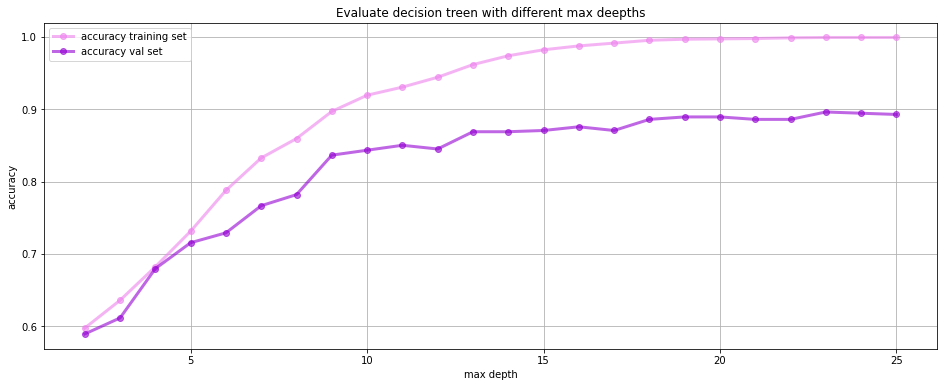

In [6]:
# Plotting
plt.figure(figsize=(16, 6))
plt.plot(depth_arr, train_accuracy, 'bo-', label=r'accuracy training set', color="violet", alpha=0.6, linewidth=3)
plt.plot(depth_arr, val_accuracy, 'bo-', label=r'accuracy val set', color="darkviolet", alpha=0.6, linewidth=3)
plt.xlabel('max depth'); plt.ylabel(r'accuracy')
plt.title(r'Evaluate decision treen with different max deepths')
plt.legend(loc='best')
plt.grid()

Accuracy on validation set: 86.03 %


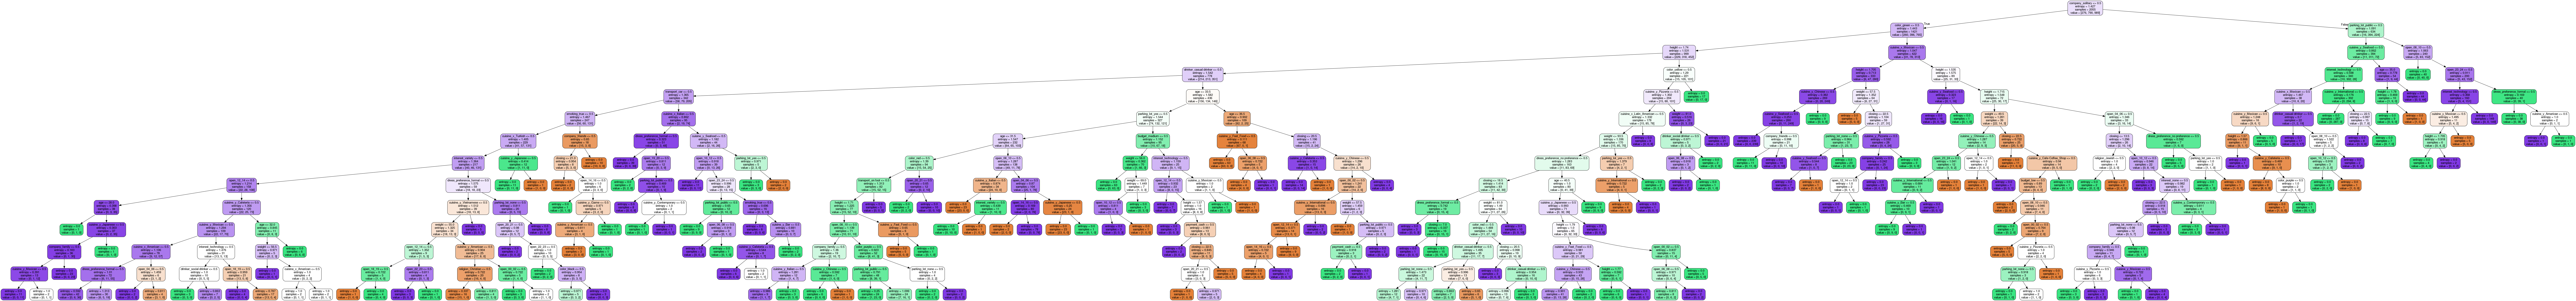

In [7]:
## Basically, after max_depth = 13 nothing better happens

random_state= np.random.randint(low=0, high=1e5)

clf = tree.DecisionTreeClassifier(max_depth=13, criterion='entropy', splitter='best', random_state=random_state)
clf = clf.fit(x_train, y_train)

output = clf.predict(x_val)
target = y_val
accuracy =sum(output == target)/ len(target)
print("Accuracy on validation set: {:.2f} %".format(accuracy*100))

feature_names = list(data.columns)[:-1]
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=feature_names,filled=True, rounded=True)
graph = graphviz.Source(dot_data)  
png_bytes = graph.pipe(format='png')
with open('dtree_pipe1.png','wb') as f:
    f.write(png_bytes)

from IPython.display import Image
Image(png_bytes)

Accuracy on validation set: 85.86 %


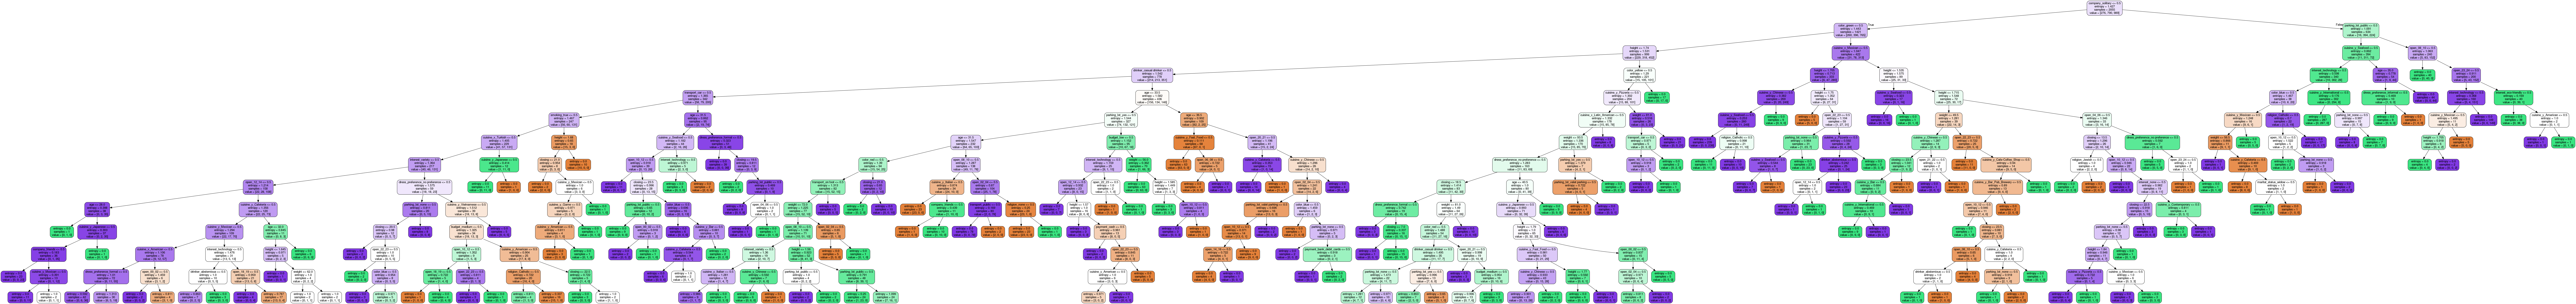

In [8]:
## Basically, after max_depth = 13 nothing better happens

random_state= np.random.randint(low=0, high=1e5)

clf = tree.DecisionTreeClassifier(max_depth=13, criterion='entropy', splitter='best', random_state=random_state)
clf = clf.fit(x_train, y_train)

output = clf.predict(x_val)
target = y_val
accuracy =sum(output == target)/ len(target)
print("Accuracy on validation set: {:.2f} %".format(accuracy*100))

feature_names = list(data.columns)[:-1]
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=feature_names,filled=True, rounded=True)
graph = graphviz.Source(dot_data)  
png_bytes = graph.pipe(format='png')
with open('dtree_pipe2.png','wb') as f:
    f.write(png_bytes)

from IPython.display import Image
Image(png_bytes)

In [9]:
with open('decision_tree_log', 'w') as out_file:
    for line in zip(data.columns[clf.tree_.feature], clf.tree_.threshold, clf.tree_.children_left, clf.tree_.children_right):  
        out_file.write(str(line[0]))
        out_file.write(str(line[1]))
        
        out_file.write("\n")

In [ ]:
raw_list = [KNeighborsClassifier(),LinearRegression(), QuadraticDiscriminantAnalysis(),GaussianNB(),SVC()]  

classifiers = build_classifiers(x_train, y_train)
best_classifiers, predicted = build_stacked_classifier(classifiers,x_train, y_train, x_val, y_val)
accuracy = accuracy_score(y_train, predicted)
print("\nBest set of classifiers:", best_classifiers)
print("\nBest accuracy:",accuracy)



## Comment:

Based on log file from Decision tree with deepth 13:
The following features does not occur in splitting process:

* budget_high 
* payments other than cash
* parking_lot_valet parking
* marital_status_widow
* marital_status_single
* marital_status_married
* religion other than catholic
* cuisine_x_Bar
* cuisine_x_Italian
* open_16_18
